In [1]:
%matplotlib inline

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras.utils

Using TensorFlow backend.


In [2]:
train = pd.read_csv('data/train.csv')

In [4]:
# Normalize data (0..255 -> 0..1)
train = train.apply(lambda x: x / 255. if x.name != 'label' else x)

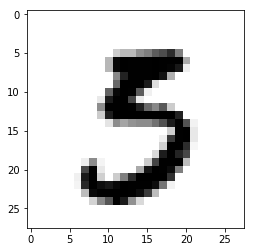

In [10]:
def show_picture(iloc, train=train):
    label = train.iloc[iloc]['label']
    p = train.drop('label', axis=1).iloc[iloc].values.reshape((28, 28))
    plt.imshow(p, cmap='gray_r')

show_picture(456)

In [6]:
# Build ANN
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
# Prepare training data
sample = train.sample(frac=0.9)
x_train = sample.drop('label', axis=1).values
y_train = sample['label'].values
y_train = keras.utils.to_categorical(y_train, num_classes=10)

# Prepare test data
test = train.loc[[x for x in train.index if x not in sample.index]]
x_test = test.drop('label', axis=1).values
y_test = test['label'].values
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
# Train ANN
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=50, validation_split=0.05)

Train on 35910 samples, validate on 1890 samples
Epoch 1/50
35910/35910 [==============================] - 4s 107us/step - loss: 0.5893 - acc: 0.8194 - val_loss: 0.1951 - val_acc: 0.9481
Epoch 2/50
35910/35910 [==============================] - 3s 93us/step - loss: 0.2566 - acc: 0.9293 - val_loss: 0.1506 - val_acc: 0.9566
Epoch 3/50
35910/35910 [==============================] - 3s 95us/step - loss: 0.1950 - acc: 0.9473 - val_loss: 0.1251 - val_acc: 0.9672
Epoch 4/50
35910/35910 [==============================] - 3s 92us/step - loss: 0.1636 - acc: 0.9557 - val_loss: 0.1093 - val_acc: 0.9730
Epoch 5/50
35910/35910 [==============================] - 3s 93us/step - loss: 0.1425 - acc: 0.9615 - val_loss: 0.1119 - val_acc: 0.9720
Epoch 6/50
35910/35910 [==============================] - 3s 93us/step - loss: 0.1261 - acc: 0.9660 - val_loss: 0.1007 - val_acc: 0.9730
Epoch 7/50
35910/35910 [==============================] - 3s 94us/step - loss: 0.1141 - acc: 0.9703 - val_loss: 0.0999 - val_acc